In [ ]:
# Dependencies import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline


In [ ]:
!pip install nltk.download('stopwords')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install nltk.download('stopwords')'


In [ ]:
import itertools
import collections
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('wordnet')
#Loading Stopwords into a list
#NLTK_stop_words_list=stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from textblob import TextBlob

In [ ]:
sentiment = pd.read_csv('/content/endsars_sentimnet2.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'id', 'username', 'outlinks',
       'outlinksss', 'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [ ]:
sentiment.reset_index(inplace=True)
sentiment = sentiment.rename(columns = {'index':'Unnamed: 0'})

In [ ]:
sentiment.head(2)

,Unnamed: 0,content,sentiment
0,0,highest form intimidation offence commit give ...,neutral
1,1,taking life long time mbuhari sack drisapantam...,positive


In [ ]:
data.shape

(9737, 10)

In [ ]:
data['dd'] = data['date'].apply(lambda x: x.split(' ')[0])

In [ ]:
data['day'] = data['dd'].apply(lambda x: x.split('-')[-1])

In [ ]:
data['month'] = data['dd'].apply(lambda x: x.split('-')[1])

In [ ]:
df = data.merge(sentiment, on= ['Unnamed: 0'])

In [ ]:
oct = df.query('month == "10"').reset_index(drop=True)

In [ ]:
oct.head()

,Unnamed: 0,url,date,content_x,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,dd,day,month,content_y,sentiment
0,1733,https://twitter.com/eokon65/status/13226751958...,2020-10-31 23:01:55+00:00,Na Revolution we want this month\n@endsars,1322675195849678853,eokon65,[],NaN,[],NaN,2020-10-31,31,10,na revolution want month endsars,neutral
1,1734,https://twitter.com/UkawunnePaul/status/132267...,2020-10-31 22:52:50+00:00,Rivers state is on fire \n@@Endsars@endbadgove...,1322672908850860034,UkawunnePaul,[],NaN,[],NaN,2020-10-31,31,10,river state fire endsarsendbadgovernment,neutral
2,1735,https://twitter.com/Olubaba66177312/status/132...,2020-10-31 22:20:25+00:00,@adekunleGOLD Then after all those useless gov...,1322664752007598081,Olubaba66177312,[],NaN,[],NaN,2020-10-31,31,10,adekunlegold useless governor president say sh...,negative
3,1736,https://twitter.com/IyiUba/status/132264450566...,2020-10-31 20:59:58+00:00,@IPOB_Community @NnamdiFans @AmnestyNigeria @U...,1322644505661566976,IyiUba,[],NaN,[],NaN,2020-10-31,31,10,ipobcommunity nnamdifans amnestynigeria usinni...,neutral
4,1737,https://twitter.com/IyiUba/status/132264096662...,2020-10-31 20:45:54+00:00,@AloyEjimakor Ipob is now bearing the burden o...,1322640966625320961,IyiUba,[],NaN,[],NaN,2020-10-31,31,10,aloyejimakor ipob bearing burden offence commi...,neutral


In [ ]:
oct.columns

Index(['Unnamed: 0', 'url', 'date', 'content_x', 'id', 'username', 'outlinks',
       'outlinksss', 'tcooutlinks', 'tcooutlinksss', 'dd', 'day', 'month',
       'content_y', 'sentiment'],
      dtype='object')

In [ ]:
oct_data = oct[['content_y', 'sentiment', 'day', 'month']]
oct_data = oct_data.rename(columns = {'content_y':'content'})

In [ ]:
oct_data.head()

,content,sentiment,day,month
0,na revolution want month endsars,neutral,31,10
1,river state fire endsarsendbadgovernment,neutral,31,10
2,adekunlegold useless governor president say sh...,negative,31,10
3,ipobcommunity nnamdifans amnestynigeria usinni...,neutral,31,10
4,aloyejimakor ipob bearing burden offence commi...,neutral,31,10


In [ ]:
oct_data.to_csv('es_oct.csv', index=False)

In [ ]:
data.shape

(9737, 13)

In [ ]:
# select the text data
data = data[['content']]

In [ ]:
data.head()

,content
0,This is the highest form of intimidation\nWhat...
1,Why is it taking a life long time for @MBuhari...
2,"Even Desmond Elliot is quite , ,,, what is tha..."
3,When will CBN freeze the account of @DrIsaPant...
4,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...


In [ ]:
df_copy = data[['content']]

#### cleaning the data

In [ ]:
data.shape

(9737, 1)

In [ ]:
data['content']=data['content'].str.lower() # convert the text to lower case

In [ ]:
data.head()

,content
0,this is the highest form of intimidation\nwhat...
1,why is it taking a life long time for @mbuhari...
2,"even desmond elliot is quite , ,,, what is tha..."
3,when will cbn freeze the account of @drisapant...
4,@obiejazzyup @yelesowore @mbuhari @endsars @mb...


### stop word removal

In [ ]:
STOPWORDS = set(NLTK_stop_words_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['content'] = data['content'].apply(lambda text: cleaning_stopwords(text))

### removing puncatuation mark

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['content']= data['content'].apply(lambda x: cleaning_punctuations(x))
data['content'].head()

0    highest form intimidation offence commit give ...
1    taking life long time mbuhari sack drisapantam...
2    even desmond elliot quite   womans name look l...
3    cbn freeze account drisapantami  cbn quick fre...
4    obiejazzyup yelesowore mbuhari endsars mbujari...
Name: content, dtype: object

### removing repeating characters using regular expression

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['content'] = data['content'].apply(lambda x: cleaning_repeating_char(x))
data['content'].head()

0    highest form intimidation offence commit give ...
1    taking life long time mbuhari sack drisapantam...
2    even desmond elliot quite   womans name look l...
3    cbn freeze account drisapantami  cbn quick fre...
4    obiejazzyup yelesowore mbuhari endsars mbujari...
Name: content, dtype: object

## removing URL's since the data is collected from a search engine

In [ ]:
def cleaning_URLs(data):
    return re.sub(r"http\S+", "", data) #re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['content'] = data['content'].apply(lambda x: cleaning_URLs(x))
data['content'].head()

0    highest form intimidation offence commit give ...
1    taking life long time mbuhari sack drisapantam...
2    even desmond elliot quite   womans name look l...
3    cbn freeze account drisapantami  cbn quick fre...
4    obiejazzyup yelesowore mbuhari endsars mbujari...
Name: content, dtype: object

## removing numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['content'] = data['content'].apply(lambda x: cleaning_numbers(x))
data['content'].head()

0    highest form intimidation offence commit give ...
1    taking life long time mbuhari sack drisapantam...
2    even desmond elliot quite   womans name look l...
3    cbn freeze account drisapantami  cbn quick fre...
4    obiejazzyup yelesowore mbuhari endsars mbujari...
Name: content, dtype: object

### remove emoji

In [ ]:
#!pip install emoji

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
data['content'] = data['content'].apply(lambda x: remove_emoji(x))
data['content'].head()

0    highest form intimidation offence commit give ...
1    taking life long time mbuhari sack drisapantam...
2    even desmond elliot quite   womans name look l...
3    cbn freeze account drisapantami  cbn quick fre...
4    obiejazzyup yelesowore mbuhari endsars mbujari...
Name: content, dtype: object

## Tokenize the data

In [ ]:
tokenized_data = data['content'].apply(lambda x: x.split())
tokenized_data.head()

0    [highest, form, intimidation, offence, commit,...
1    [taking, life, long, time, mbuhari, sack, dris...
2    [even, desmond, elliot, quite, womans, name, l...
3    [cbn, freeze, account, drisapantami, cbn, quic...
4    [obiejazzyup, yelesowore, mbuhari, endsars, mb...
Name: content, dtype: object

### lemmetizer the data

In [ ]:
lm = nltk.WordNetLemmatizer()

tokenized_data = tokenized_data.apply(lambda x: [lm.lemmatize(i) for i in x]) # stemming
tokenized_data.head()

0    [highest, form, intimidation, offence, commit,...
1    [taking, life, long, time, mbuhari, sack, dris...
2    [even, desmond, elliot, quite, woman, name, lo...
3    [cbn, freeze, account, drisapantami, cbn, quic...
4    [obiejazzyup, yelesowore, mbuhari, endsars, mb...
Name: content, dtype: object

In [ ]:
for i in range(len(tokenized_data)):
    tokenized_data[i] = ' '.join(tokenized_data[i])

data['content'] = tokenized_data

In [ ]:
data.head()

,content
0,highest form intimidation offence commit give ...
1,taking life long time mbuhari sack drisapantam...
2,even desmond elliot quite woman name look like...
3,cbn freeze account drisapantami cbn quick free...
4,obiejazzyup yelesowore mbuhari endsars mbujari...


### word cloud for all data

In [ ]:
data_word = data['content']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_word))
plt.imshow(wc,interpolation='bilinear')

### Sentiment Analysis on the data

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in data['content']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [ ]:
# sentiment statistics cone
df = pd.DataFrame([list(data['content']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['content', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')

In [ ]:
df.head()

In [ ]:
df['sentiment_category'].value_counts().plot(kind='bar')

In [ ]:
df['sentiment_category'].value_counts(normalize=True) * 100

In [ ]:
data['sentiment'] = df['sentiment_category']

In [ ]:
data.head()

In [ ]:
data.to_csv('endsars_sentimnet2.csv', index=False)

### World cloud on the sentiment

In [ ]:
data.head()

In [ ]:
data.head()

## each sentiment world cloud

In [ ]:
data_positive = data[data['sentiment'] == 'positive'].reset_index(drop=True)

data_neutral = data[data['sentiment'] == 'neutral'].reset_index(drop=True)

data_negative = data[data['sentiment'] == 'negative'].reset_index(drop=True)


## word cloud on positive word

In [ ]:
data_positive.shape

In [ ]:
data_word_positive = data_positive['content']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="white",
               collocations=False).generate(" ".join(data_word_positive))
plt.imshow(wc, interpolation='bilinear')

## word cloud on neutral word

In [ ]:
data_neutral.shape

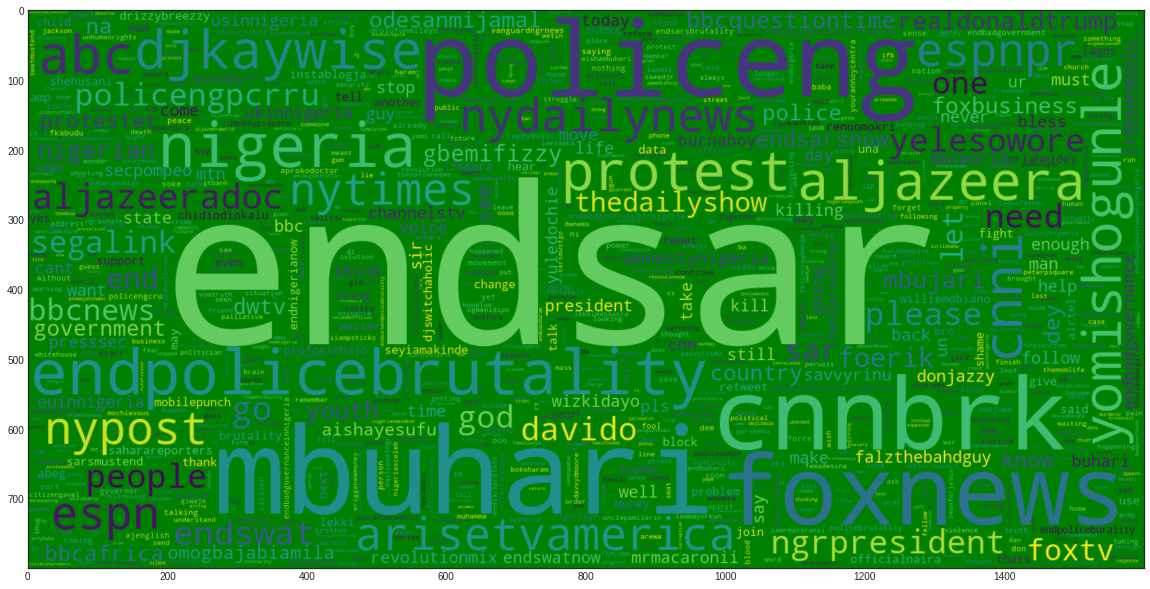

In [ ]:
data_word_neutral = data_neutral['content']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="green",
               collocations=False).generate(" ".join(data_word_neutral))
plt.imshow(wc,interpolation='bilinear')

## word cloud on negative word

In [ ]:
data_negative.shape

(1605, 2)

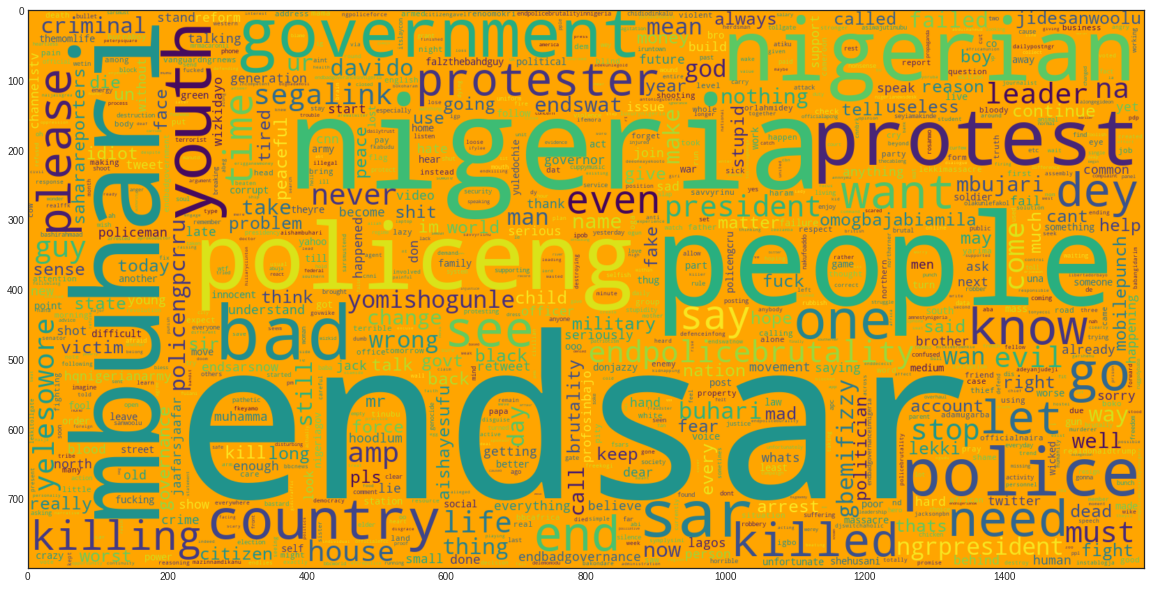

In [ ]:
data_word_negative = data_negative['content']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="orange",
               collocations=False).generate(" ".join(data_word_negative))
plt.imshow(wc,interpolation='bilinear')